# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split          
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings


## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [7]:
data = pd.read_csv("hmeq.csv")
df = data.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [9]:
print('Shape:', df.shape)
df.head() 

Shape: (5960, 13)


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [25]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [10]:
def check_missing_values(data):
    '''
    Prints the number of features with missing values, their percentage
    in the total dataset, and visualizes these missing values.

    ---
    ### Parameters
    data <DataFrame>: DataFrame with the data to be checked for missing values
    '''
    # Calculate the number of missing values per column and filter columns that have missing values
    count = data.isnull().sum()
    count = count[count > 0]

    # Early exit if no missing values are found
    if count.empty:
        print("No missing values found in the dataset.")
        return

    # Calculate the percentage of missing values
    percentage = (count / len(data)) * 100

    # Creating a DataFrame to display count and percentage of missing values
    result = pd.DataFrame({'Count': count, 'Percentage %': percentage.round(2)})

    # Print results
    print(f"{result.shape[0]} columns have missing values")
    print('-'*30)
    print(result)

    # Plotting the missing values
    msno.bar(data, figsize=(10, 5), fontsize=12, color="skyblue")

11 columns have missing values
------------------------------
         Count  Percentage %
MORTDUE    518          8.69
VALUE      112          1.88
REASON     252          4.23
JOB        279          4.68
YOJ        515          8.64
DEROG      708         11.88
DELINQ     580          9.73
CLAGE      308          5.17
NINQ       510          8.56
CLNO       222          3.72
DEBTINC   1267         21.26


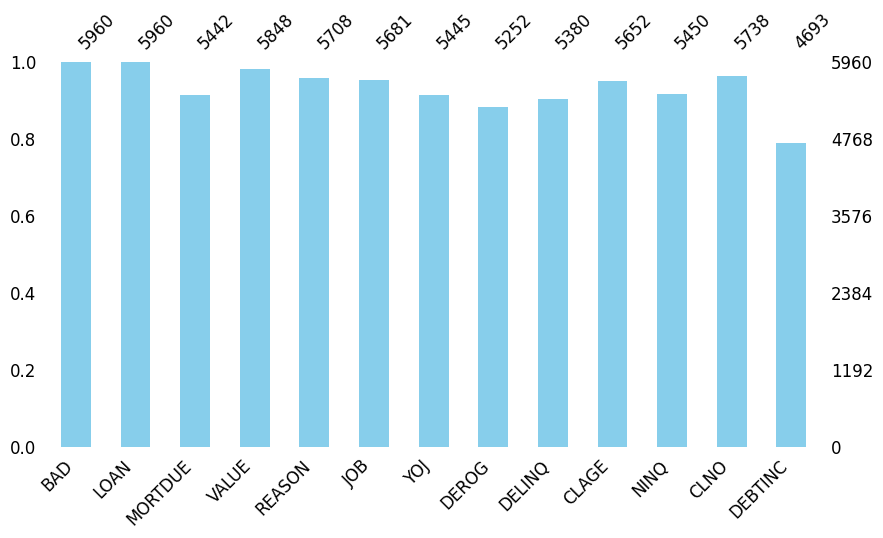

In [11]:
check_missing_values(df)

In [ ]:
# Define numerical and categorical columns based on your dataset
num_cols = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

cat_cols = ['REASON', 'JOB']

In [15]:
# Create a skewness summary DataFrame
skew_summary = pd.DataFrame({
    'Feature': num_cols,
    'Skewness': [df[col].skew().round(2) for col in num_cols]
}).sort_values(by='Skewness', ascending=False)

skew_summary


,Feature,Skewness
4,DEROG,5.32
5,DELINQ,4.02
2,VALUE,3.05
9,DEBTINC,2.85
7,NINQ,2.62
0,LOAN,2.02
1,MORTDUE,1.81
6,CLAGE,1.34
3,YOJ,0.99
8,CLNO,0.78


All imputed features were found to be moderately to heavily skewed (skewness > 0.5), making the median a more robust choice over the mean to prevent distortion from outliers

## **Exploratory Data Analysis (EDA) and Visualization**

There are a lot of missing values, in EDA there are going to be checks if data is skewed median will be used for inputing missing values, if not mean for numeric variables. For categorical variables mode will be applied.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


In [18]:
def histogram_boxplot(data, feature, figsize=(12, 6), kde=False, bins=30):
    """
    Combined boxplot and histogram for univariate analysis.
    
    Parameters:
    -----------
    data : pd.DataFrame
        The dataset to plot from.
    feature : str
        Column name to plot.
    figsize : tuple
        Size of the entire figure.
    kde : bool
        Whether to include a Kernel Density Estimate in the histogram.
    bins : int or None
        Number of histogram bins.
    """
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize
    )
    
    # Boxplot (top)
    sns.boxplot(
        data=data, x=feature, ax=ax_box, showmeans=True, color="skyblue"
    )
    ax_box.set(xlabel="")
    
    # Histogram (bottom)
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist, bins=bins, color="steelblue"
    )
    ax_hist.axvline(data[feature].mean(), color="green", linestyle="--", label="Mean")
    ax_hist.axvline(data[feature].median(), color="black", linestyle="-", label="Median")
    ax_hist.legend()
    
    plt.suptitle(f"Boxplot & Histogram for {feature}", fontsize=14)
    plt.tight_layout()
    plt.show()

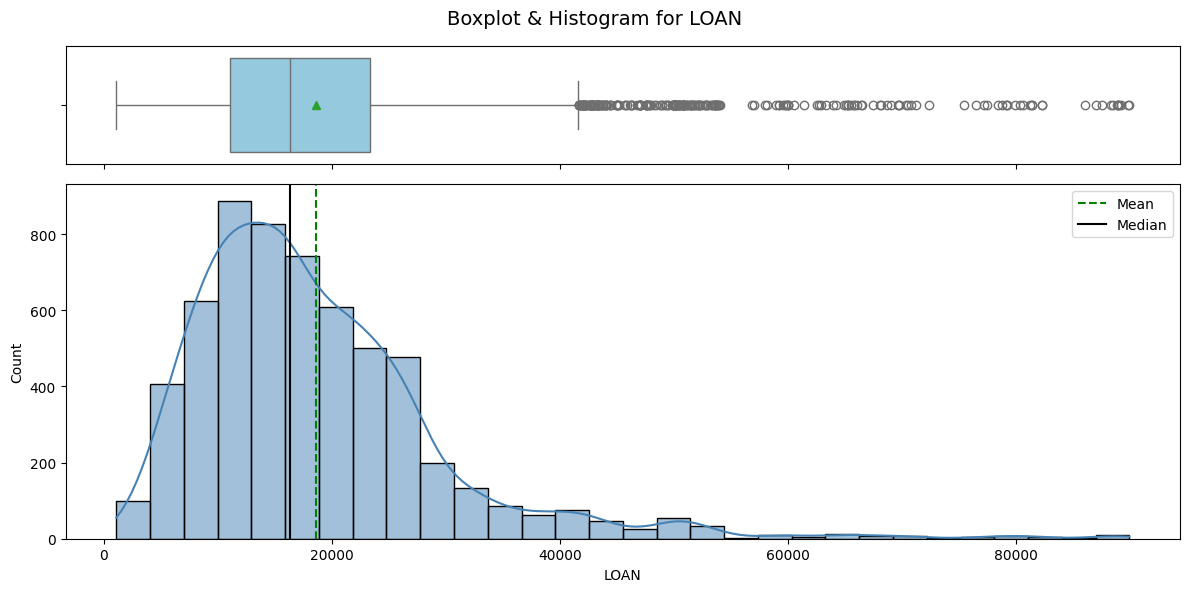

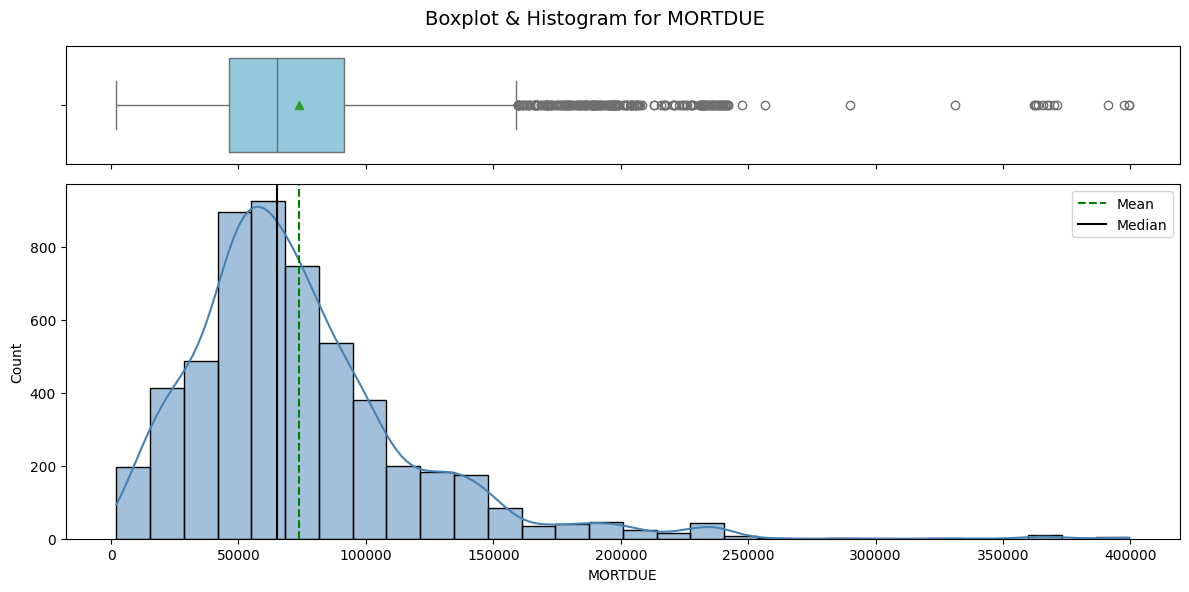

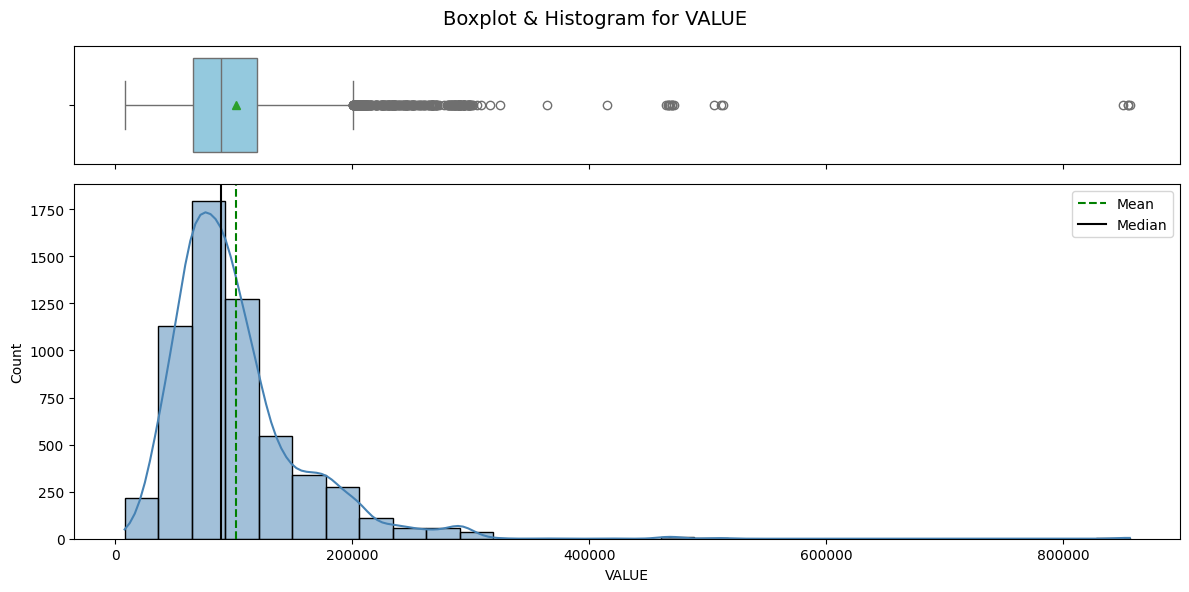

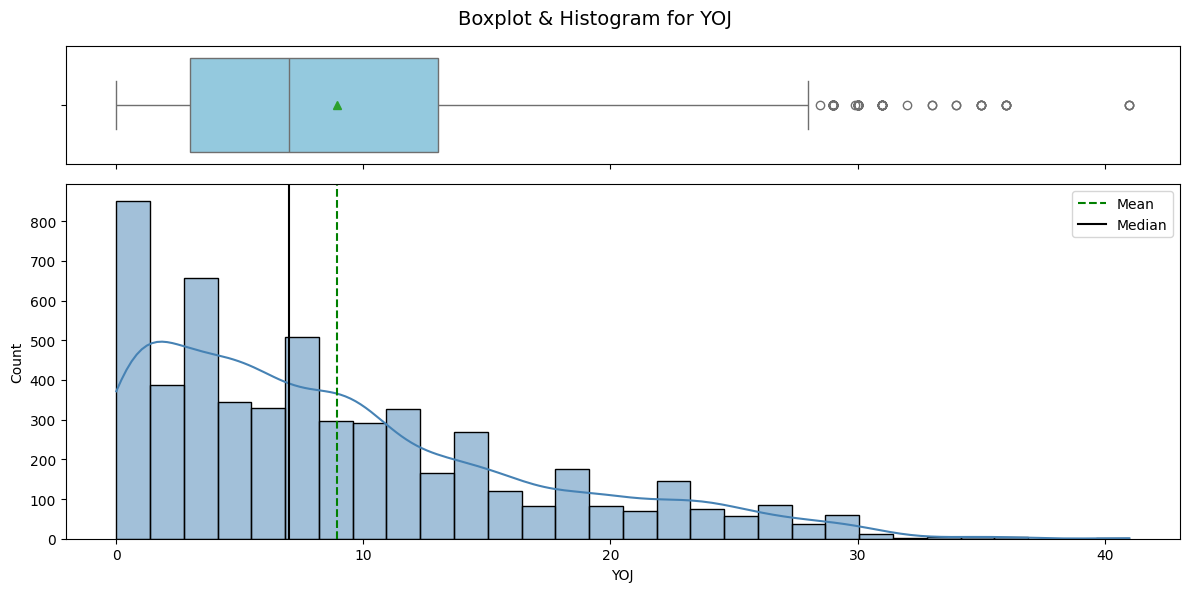

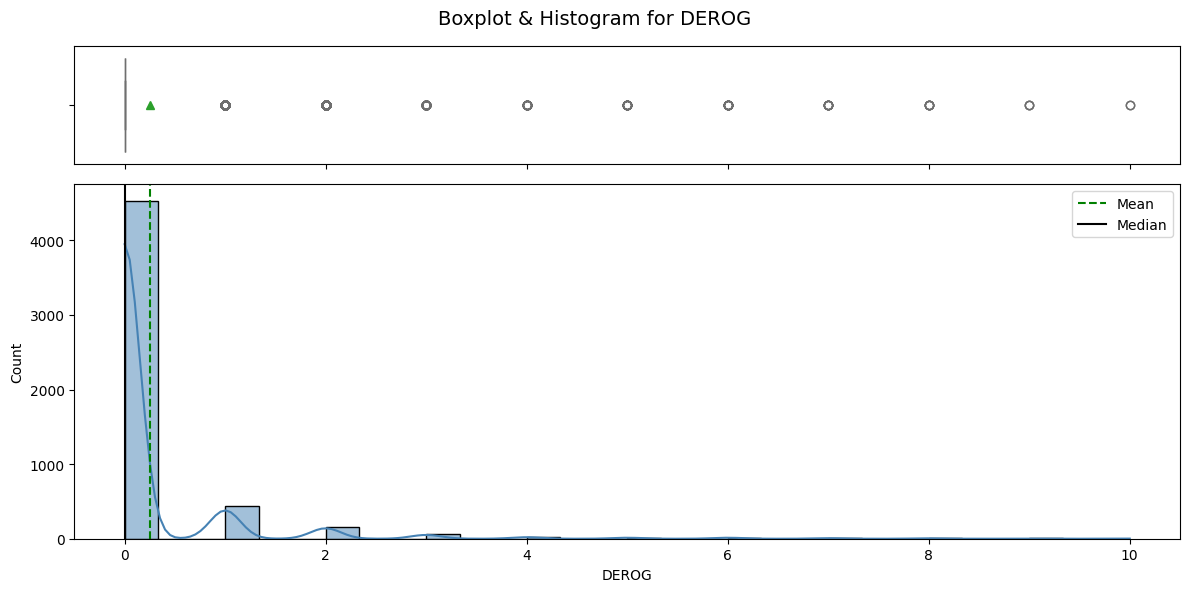

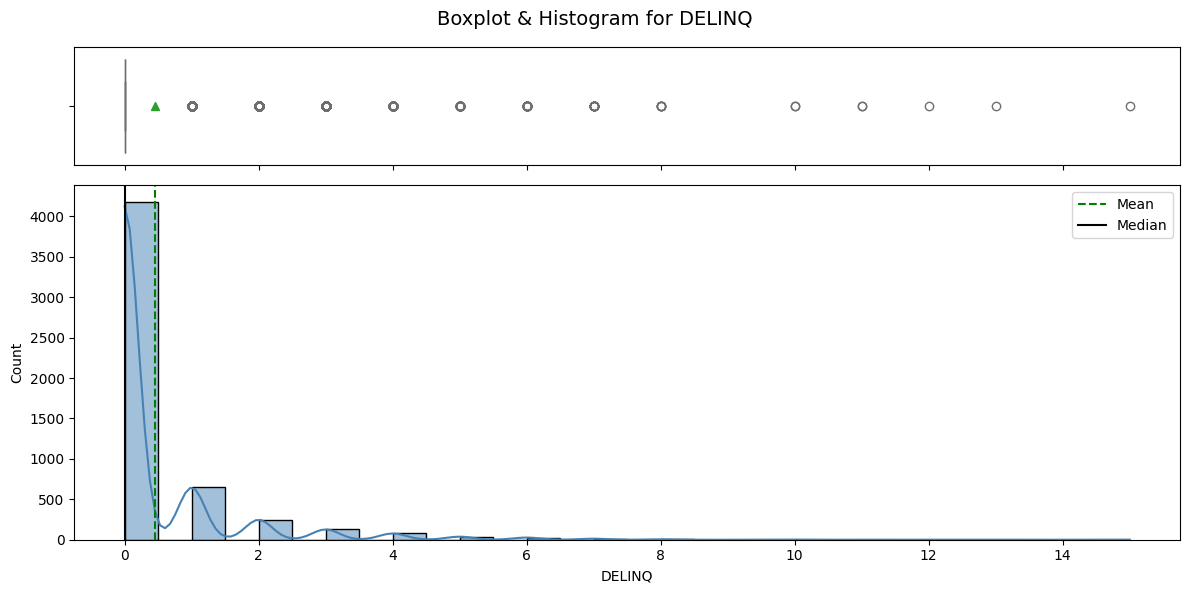

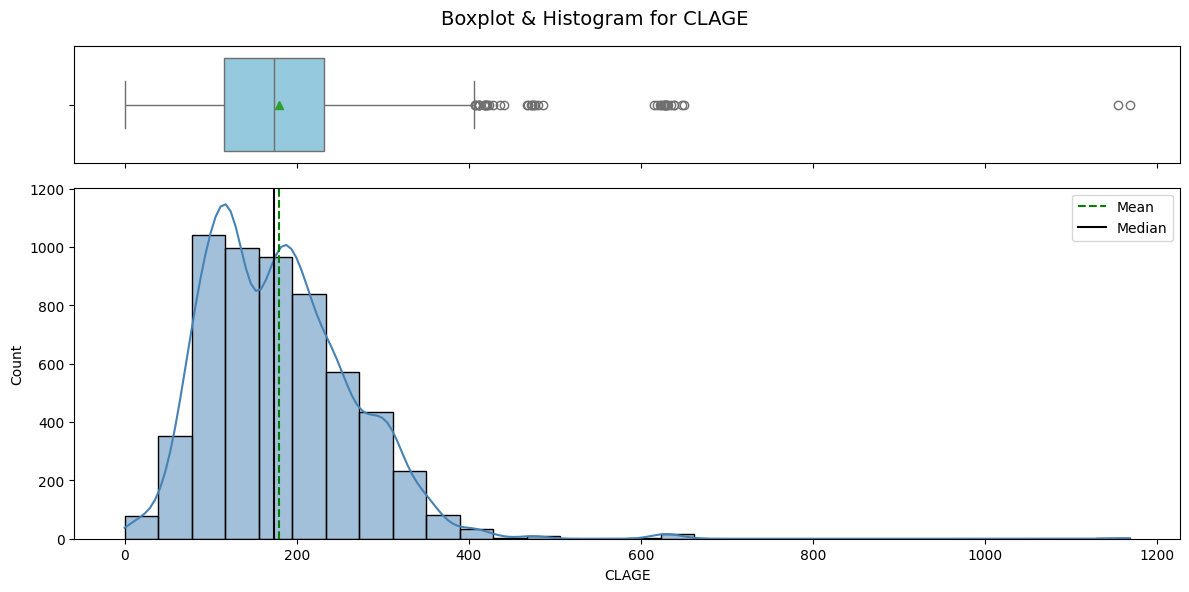

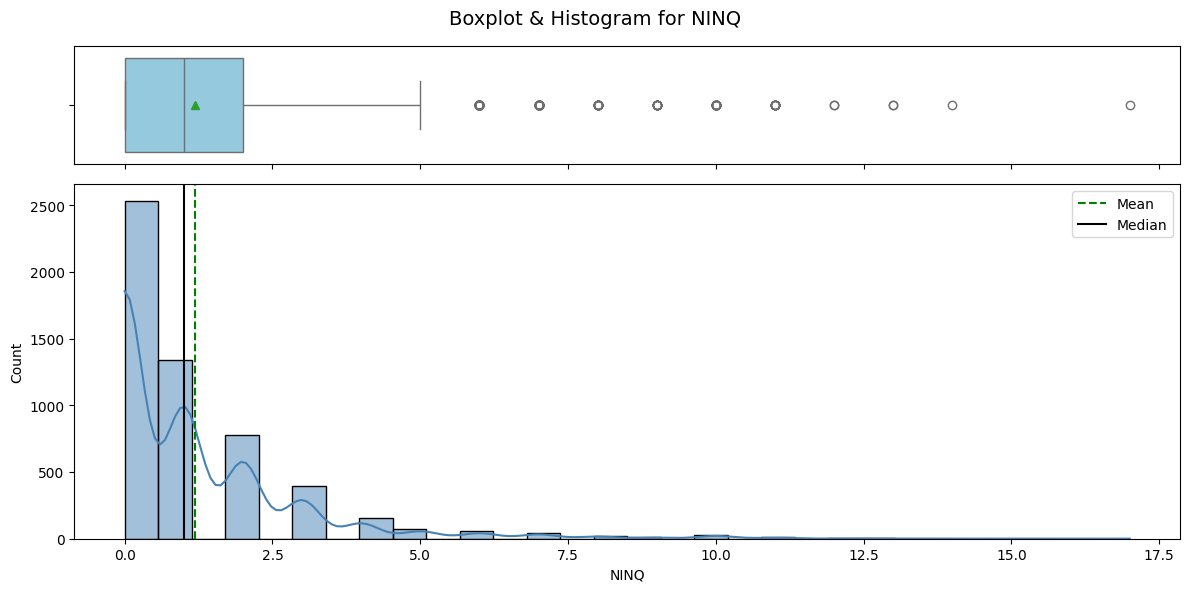

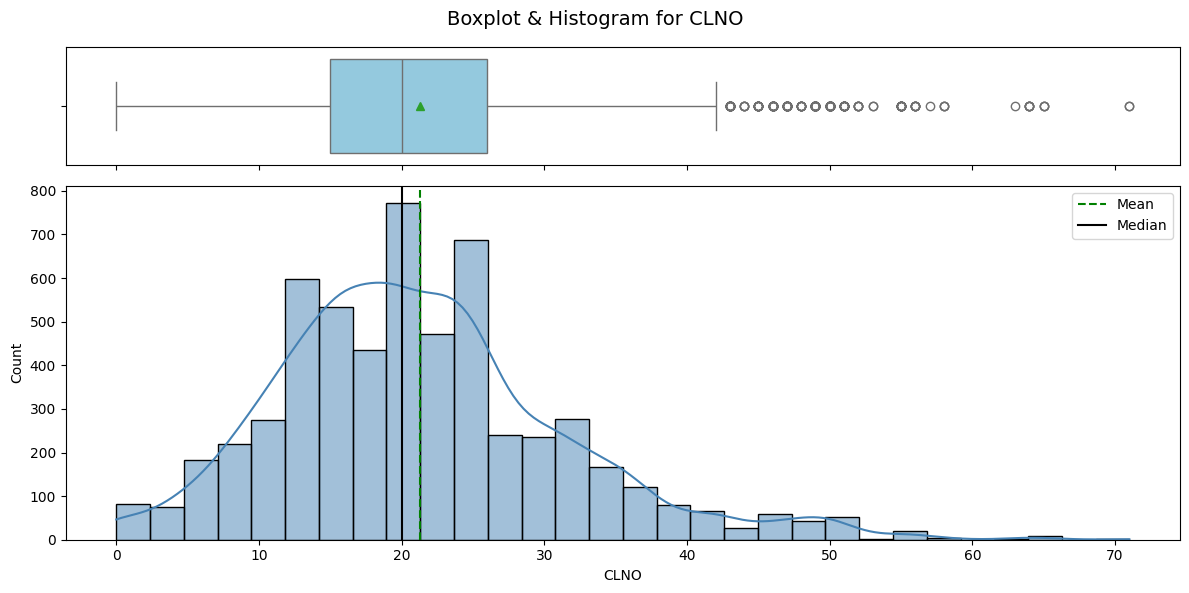

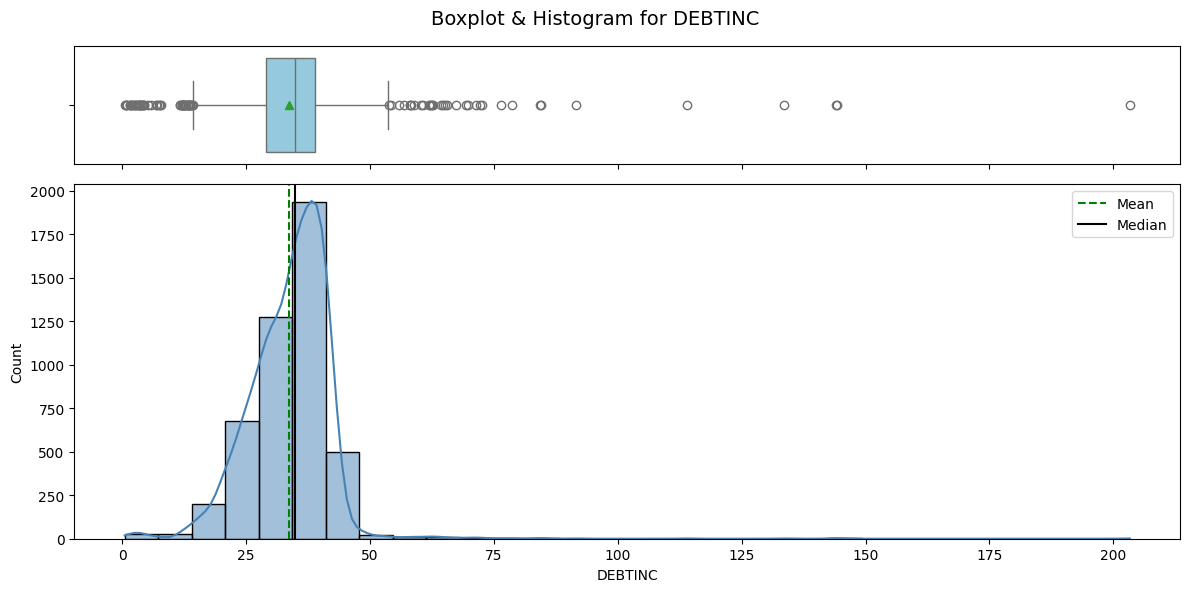

In [19]:
for col in num_cols:
    histogram_boxplot(df, col, kde=True)

##  EDA Insights: Numerical Variable Distributions

This detailed histogram + boxplot analysis revealed key patterns in the dataset:
- Many variables are **right-skewed** (LOAN, MORTDUE, VALUE, DEROG, DEBTINC), justifying **log transformation** or binning.
- Features like `DEROG`, `DELINQ`, and `DEBTINC` exhibit patterns linked to **credit risk** and will be central to modeling.
- Several numeric fields show **valid but extreme outliers** (e.g. property values > $600K). Rather than drop, we will transform.
- **YOJ** and **CLAGE** suggest borrower stability. Gaps in YOJ will be imputed by JOB category.
These insights guide our preprocessing and feature engineering strategies to improve model performance.


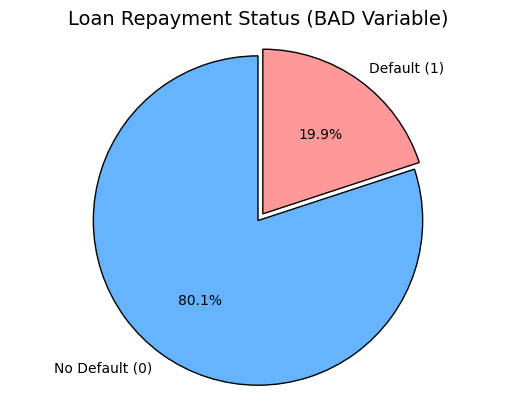

In [41]:
# Calculate default proportions
default_counts = df['BAD'].value_counts()
labels = ['No Default (0)', 'Default (1)']

# Plot pie chart
default_counts.plot(
    kind='pie',
    labels=labels,
    explode=[0.05, 0],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999'],
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Loan Repayment Status (BAD Variable)", fontsize=14)
plt.ylabel('')  
plt.axis('equal')  
plt.show()


About ~20% of applicants defaulted (BAD = 1) and ~80% repaid. There is some class imbalance, but it's manageable without special sampling techniques yet. Recall and AUC will be more informative than accuracy.

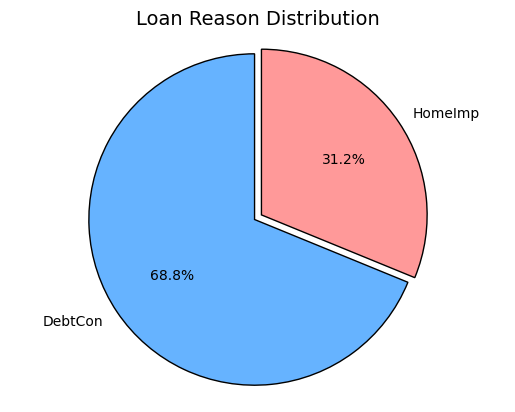

In [45]:
# Value counts for REASON
reason_counts = df['REASON'].value_counts()
labels = reason_counts.index.tolist()
colors = ['#66b3ff', '#ff9999']  # Customize based on # of categories

# Pie chart
reason_counts.plot(
    kind='pie',
    labels=labels,
    autopct='%1.1f%%',
    explode=[0.05, 0],
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Loan Reason Distribution", fontsize=14)
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio for perfect circle
plt.show()


Majority of applicants ~69% requested loans for debt consolidation, which may indicate higher financial stress or prior credit usage.

Only ~31% applied for home improvement, which could reflect a stronger financial position, as they are investing in their property.

JOB value counts:
JOB
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: count, dtype: int64


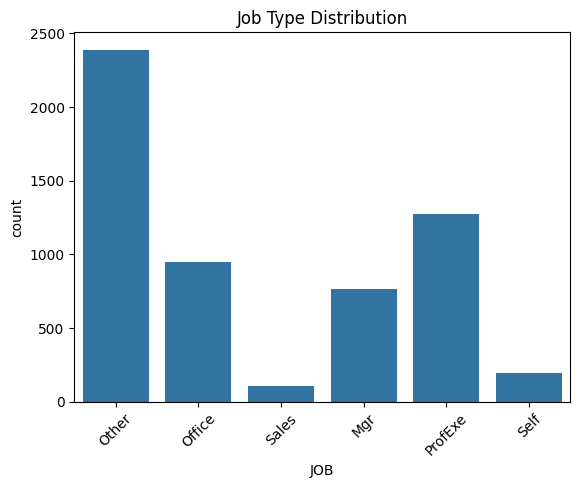

In [ ]:
# JOB -> Manager, Office, Sales, Self-employed, Professional/Executive, Other
print("JOB value counts:")
print(df['JOB'].value_counts())

sns.countplot(x='JOB', data=df)
plt.title("Job Type Distribution")
plt.xticks(rotation=45)
plt.show()

### **Bivariate Analysis**

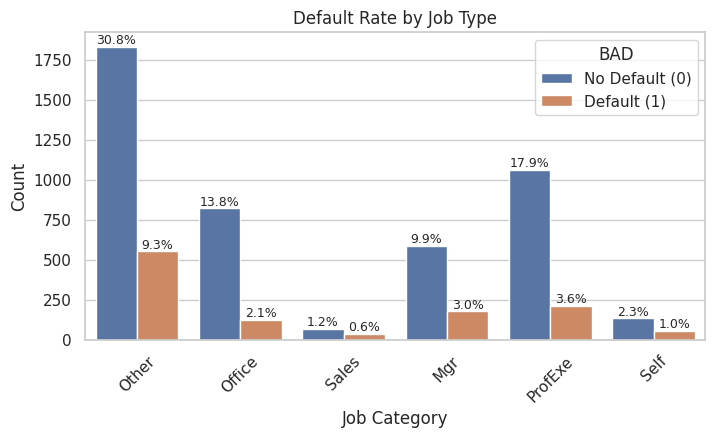

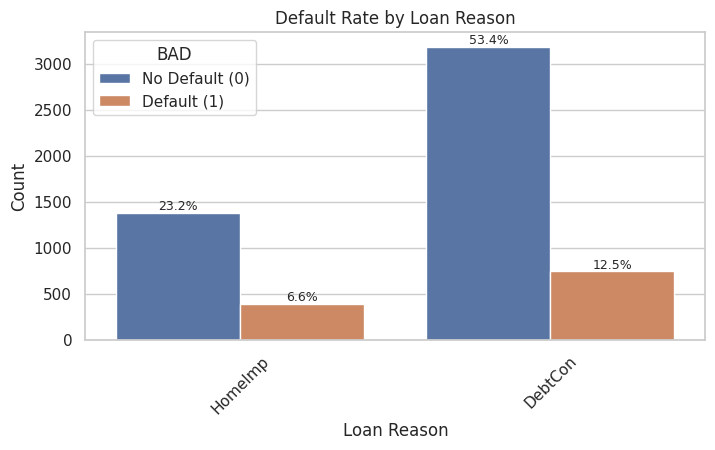

In [65]:
# Plot 1: JOB vs BAD with % annotations
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='JOB', hue='BAD', data=df)

# Title and labels
plt.title("Default Rate by Job Type")
plt.xlabel("Job Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="BAD", labels=["No Default (0)", "Default (1)"])

# Add % labels only for non-zero bars
for p in ax.patches:
    count = p.get_height()
    if count > 0:
        x = p.get_x() + p.get_width() / 2.0
        label = f"{100 * count / len(df):.1f}%"
        ax.annotate(label, (x, count), ha='center', va='bottom', fontsize=9)

plt.show()

# Plot 2: REASON vs BAD with % annotations
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='REASON', hue='BAD', data=df)

# Title and labels
plt.title("Default Rate by Loan Reason")
plt.xlabel("Loan Reason")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="BAD", labels=["No Default (0)", "Default (1)"])

# Add % labels only for non-zero bars
for p in ax.patches:
    count = p.get_height()
    if count > 0:
        x = p.get_x() + p.get_width() / 2.0
        label = f"{100 * count / len(df):.1f}%"
        ax.annotate(label, (x, count), ha='center', va='bottom', fontsize=9)

plt.show()

### Default Rate by Job Type – Observations & Insights

- **"Other"** job category is the most frequent (over 2,300 applicants), and it also has the **highest count of defaulters** (9.3%), making it both **common and risky**.
- **Professional/Executive** roles show a relatively moderate default rate (3.6%) despite being the second most common group.
- **Sales** and **Self-employed** are rare job types in the dataset, but still show some default risk.
- **Managerial (Mgr)** and **Office** jobs have moderate to low default rates, suggesting more stable profiles.
- Overall, job type influences default probability, but the **“Other” category stands out** as a risk cluster and may warrant deeper segmentation or investigation.

### Default Rate by Loan Reason – Observations & Insights

- The majority of applicants took loans for **Debt Consolidation (DebtCon)**, accounting for **53.4% of all loans**.
- Loans for **DebtCon also have the highest number of defaults** (12.5%), suggesting that applicants using loans to consolidate debt may already be in financial distress.
- In contrast, **Home Improvement (HomeImp)** loans have a lower default percentage (6.6%) and a smaller population share.
- This aligns with domain intuition: borrowers taking loans for **asset-enhancing purposes (e.g., HomeImp)** are generally more creditworthy than those consolidating debt.
- The loan **purpose is an important categorical predictor** of default risk and should be retained in modeling.

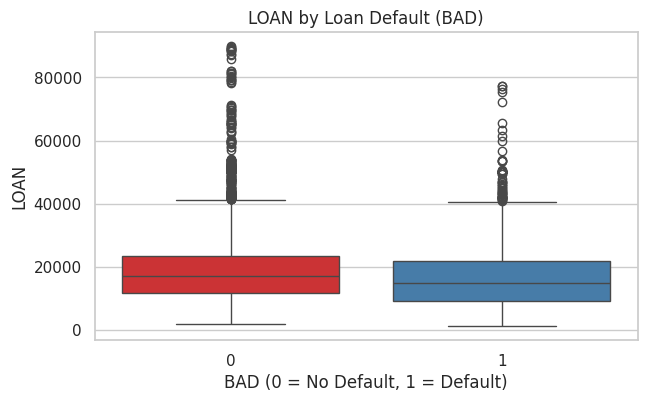

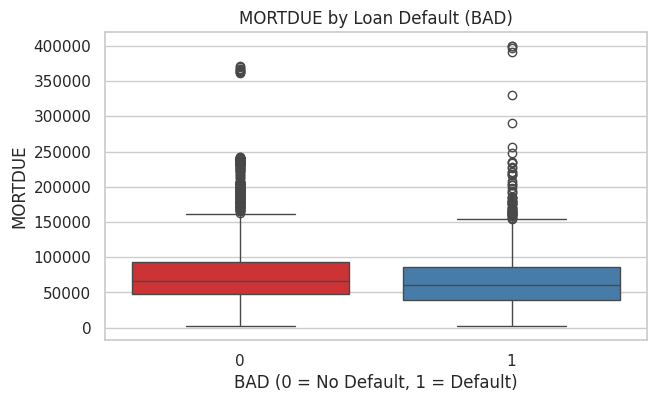

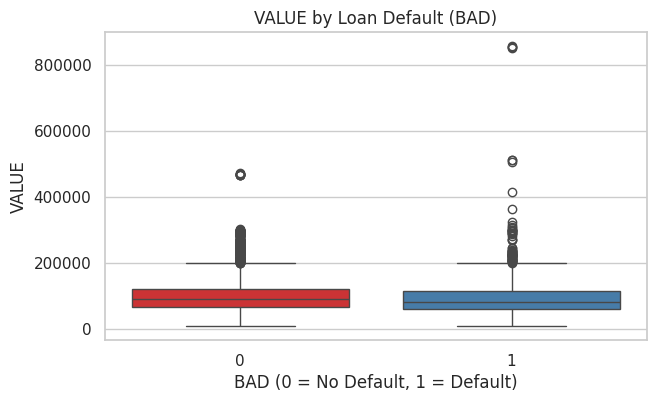

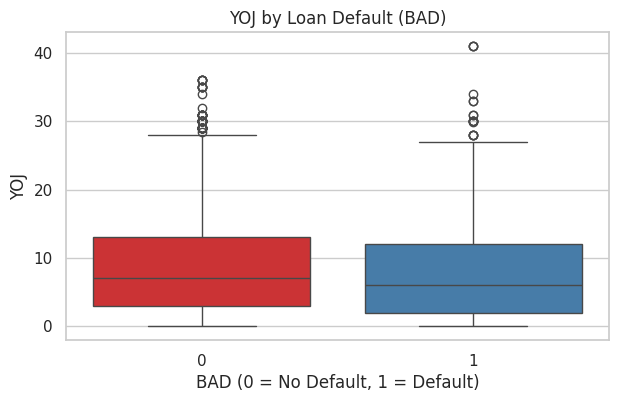

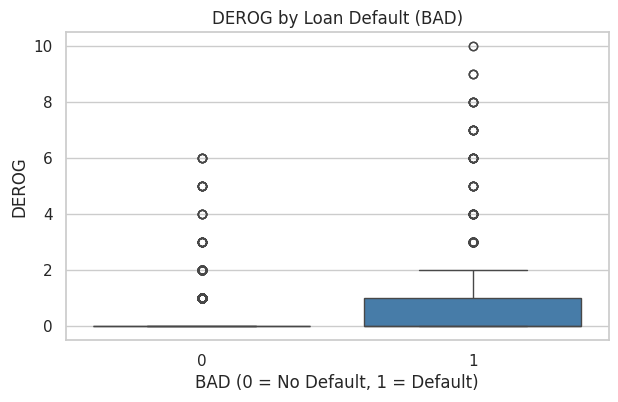

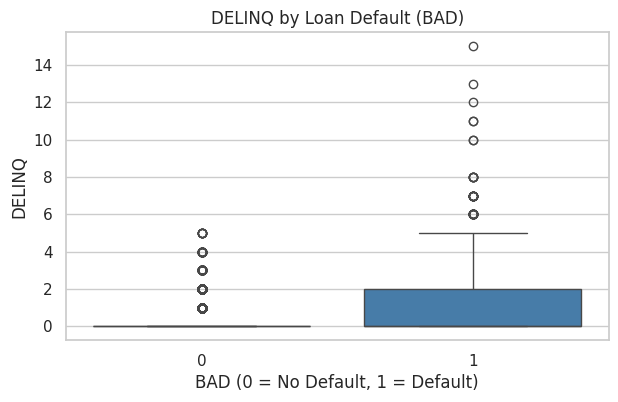

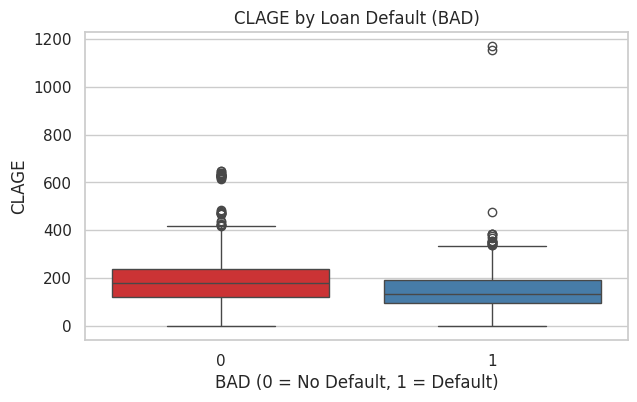

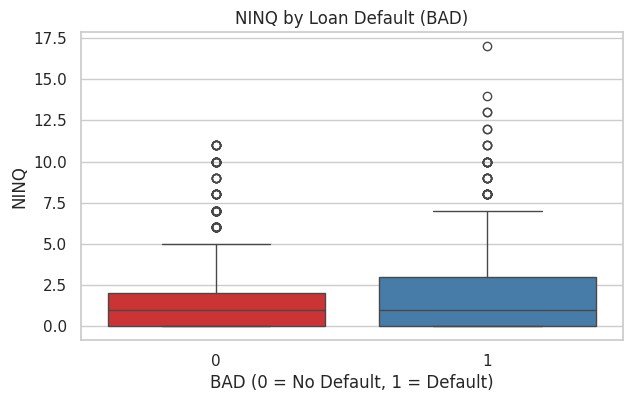

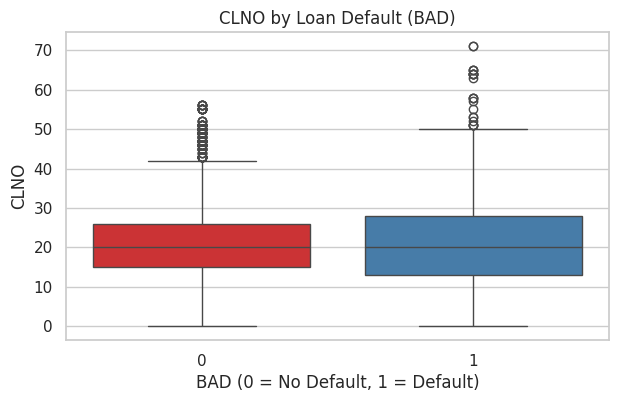

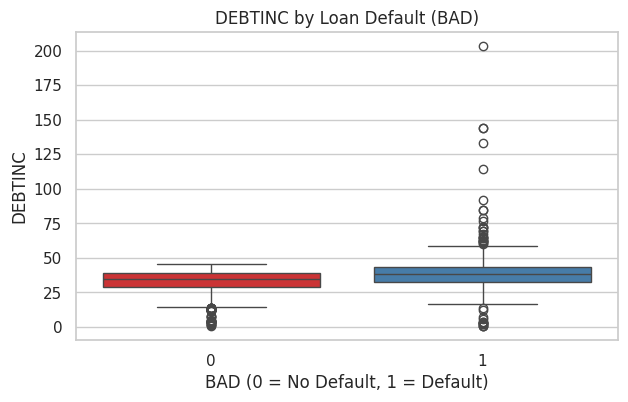

In [60]:
for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df, x='BAD', y=col, hue='BAD', palette='Set1', dodge=False, legend=False)
    plt.title(f"{col} by Loan Default (BAD)")
    plt.xlabel("BAD (0 = No Default, 1 = Default)")
    plt.ylabel(col)
    plt.show()


### **Multivariate Analysis**

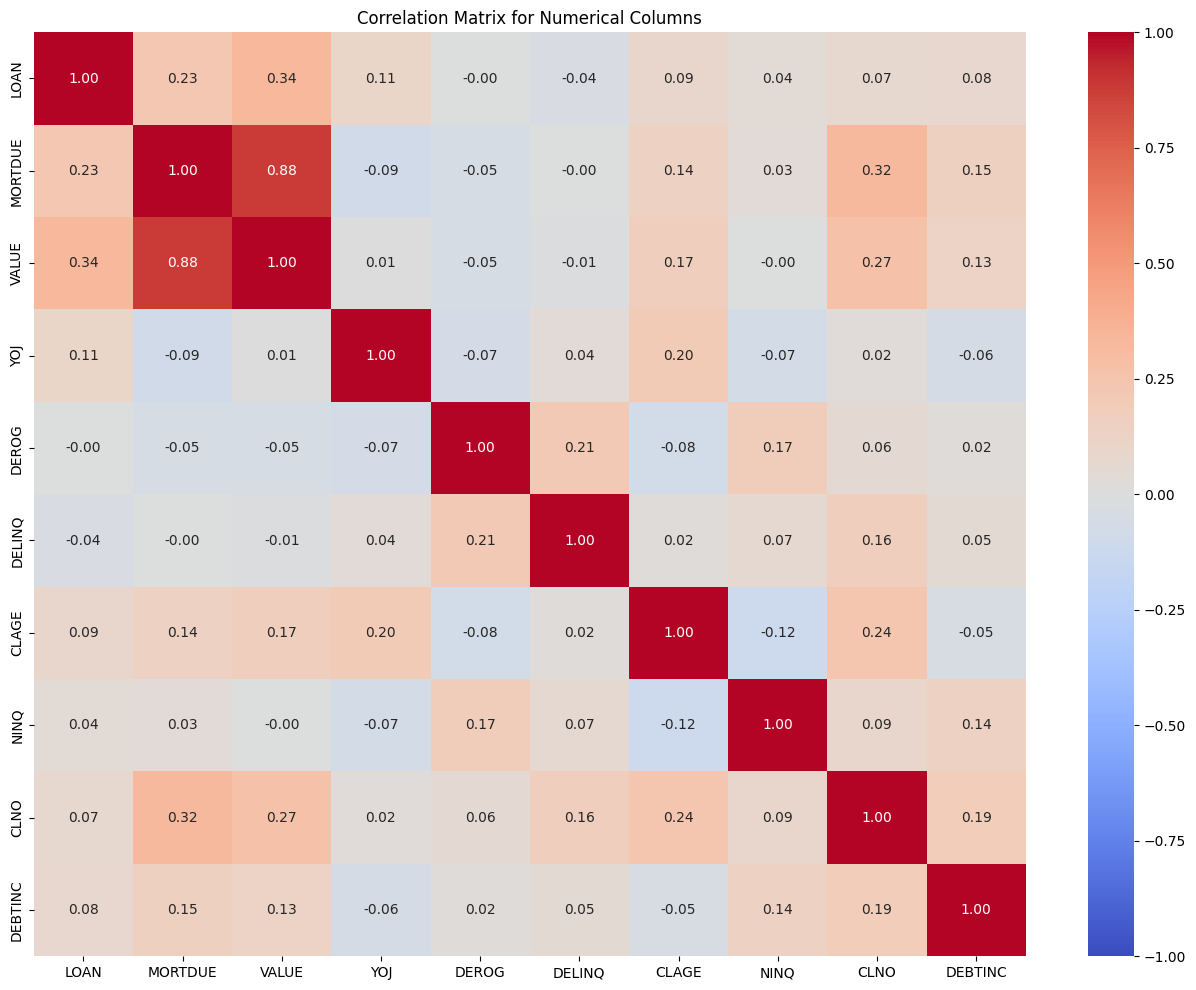

In [47]:
# Build correlation matrix for numerical columns
corr = df[num_cols].corr()

# Plot the heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr, cmap='coolwarm', vmax=1, vmin=-1,
            annot=True, fmt=".2f",
            xticklabels=corr.columns,
            yticklabels=corr.columns)
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

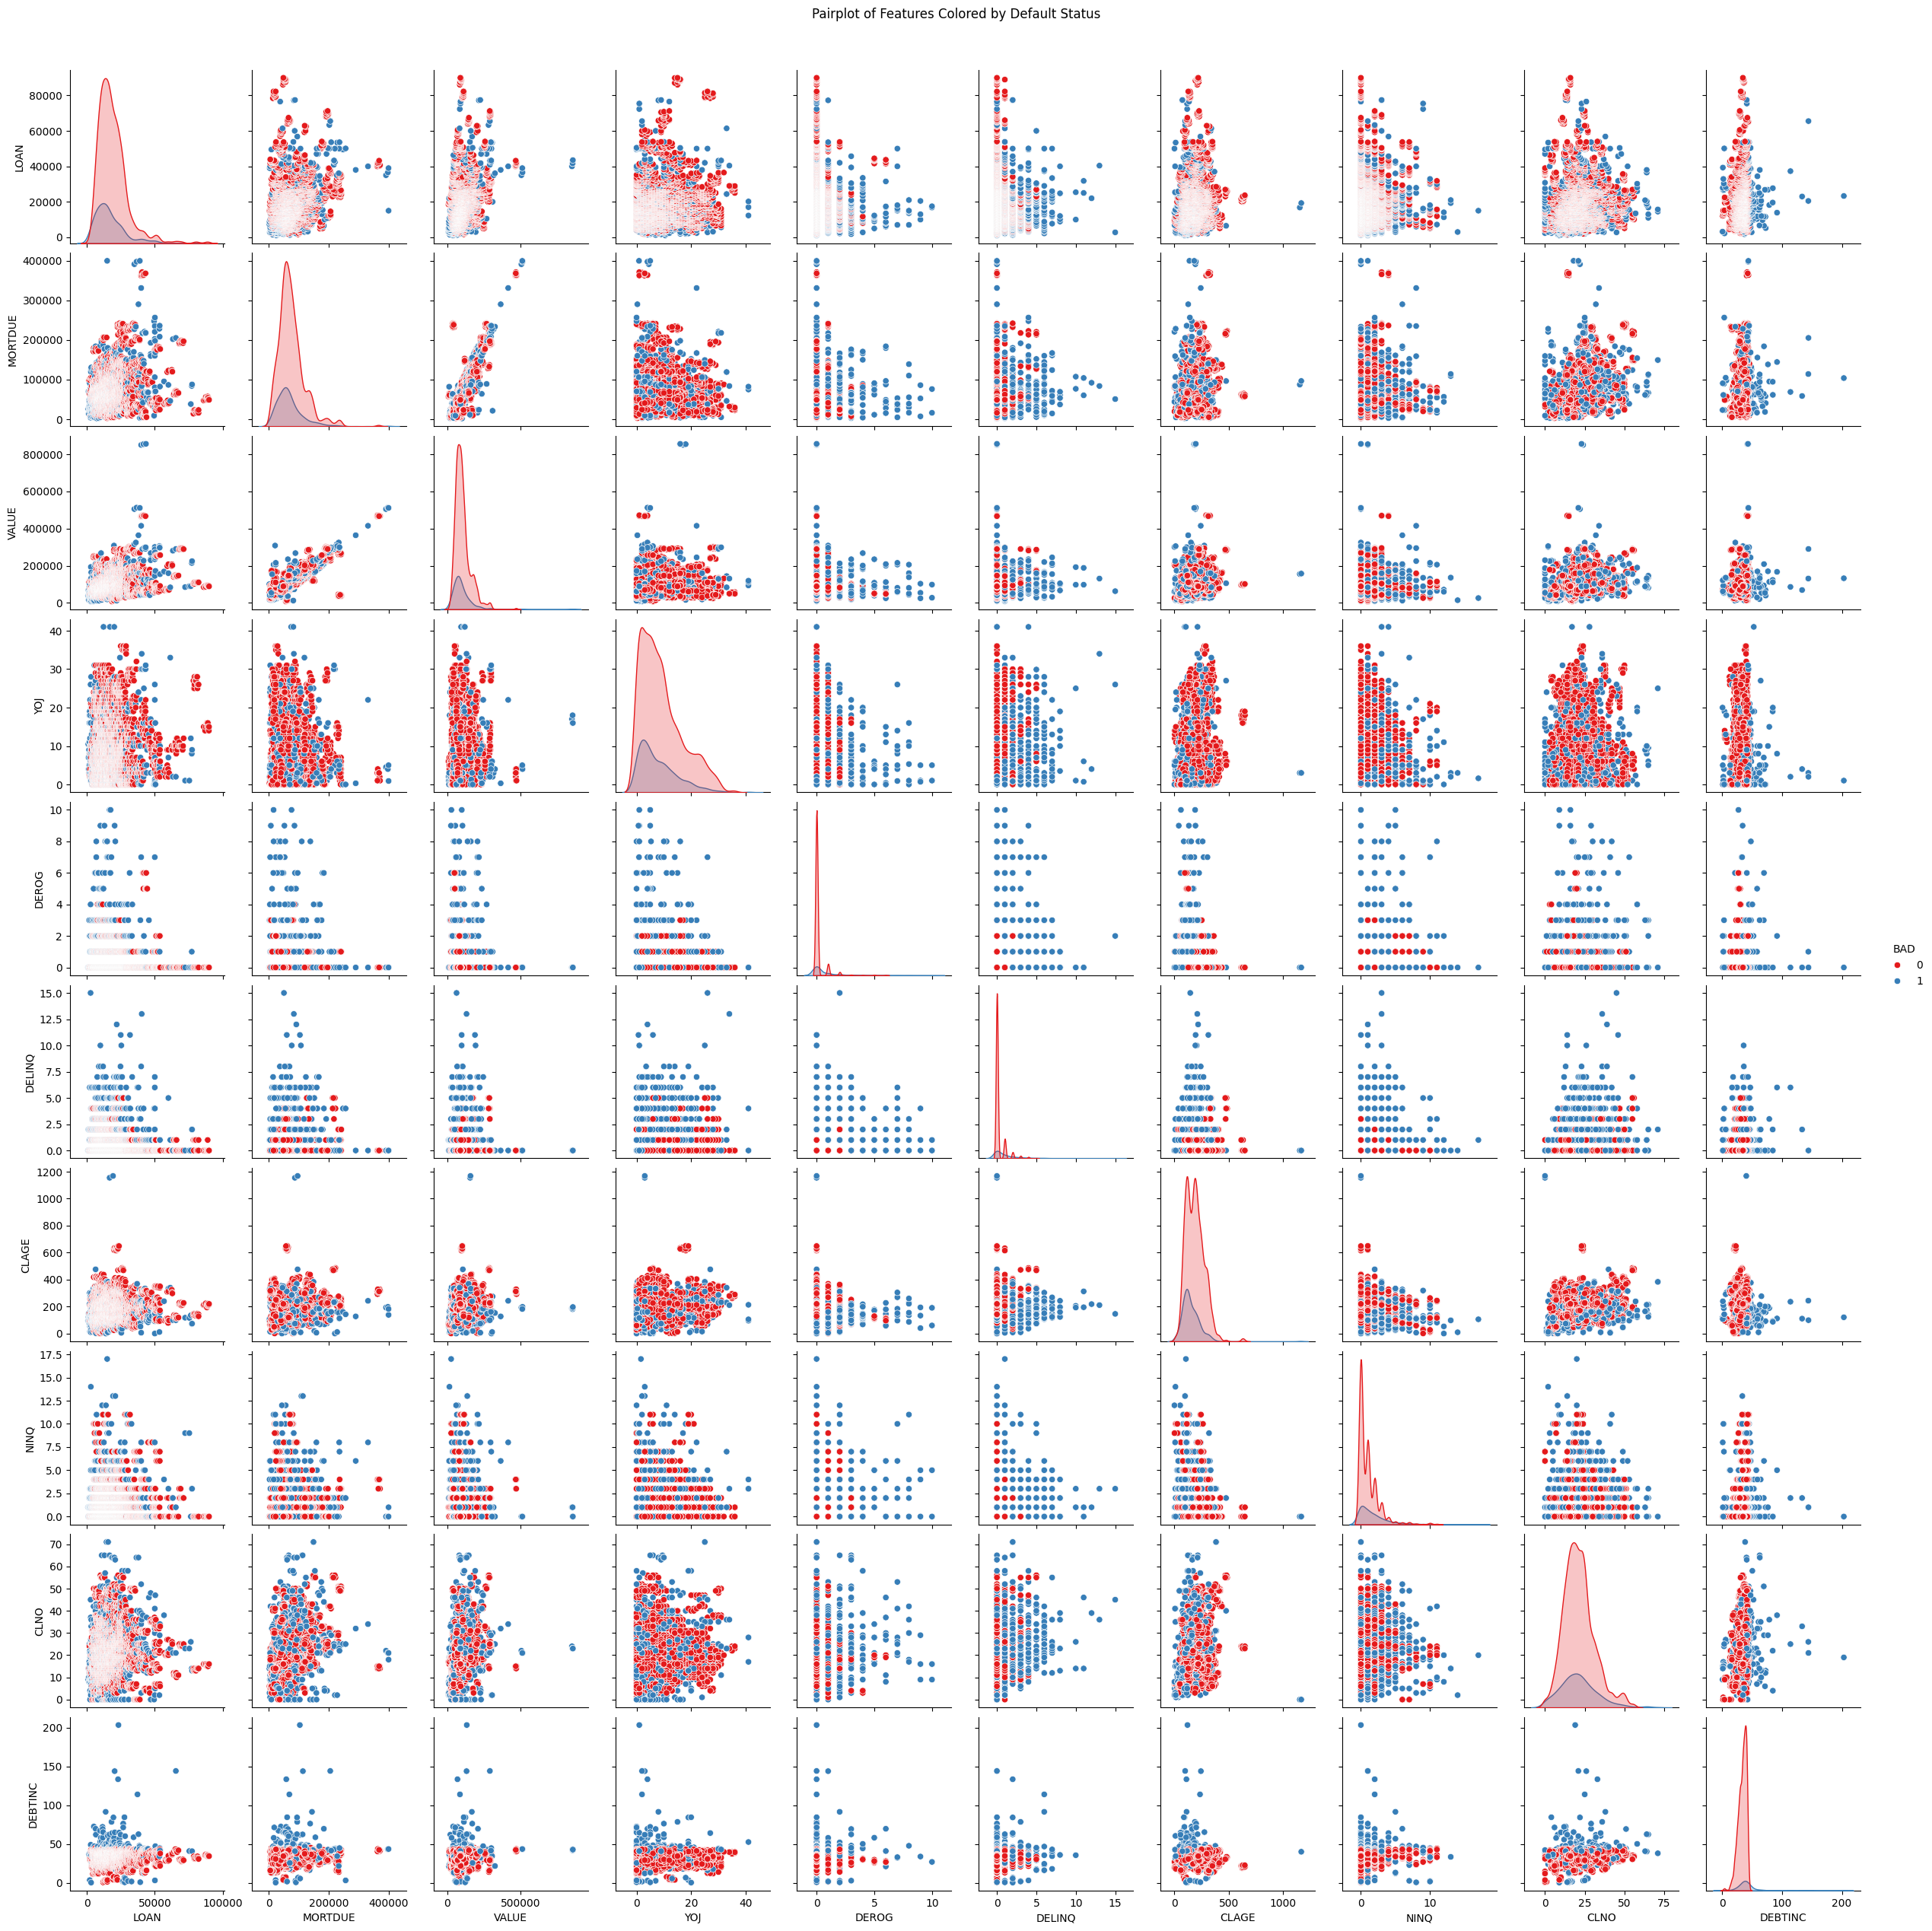

In [50]:
sns.pairplot(df, hue='BAD', diag_kind='kde', palette='Set1')
plt.suptitle('Pairplot of Features Colored by Default Status', y=1.02)
plt.show()

## Treating Outliers

## Treating Missing Values

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

### Logistic Regression

### Decision Tree

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**



### **Random Forest - Hyperparameter Tuning**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?